# Teukolsky point-particle mode tutorial

## Load `pybhpt.teuk`

In [1]:
from pybhpt.teuk import TeukolskyMode
from pybhpt.geo import KerrGeodesic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Solving the inhomogeneous radial Teukolsky equation in Kerr spacetime

The `TeukolskyMode` class constructs modes of the so-called extended homogeneous solutions to the radial Teukolsky equation for a point-particle source on a bound periodic geodesic,
$$\begin{align}
    \Psi_s &= \Psi_s^+ \Theta(r-r_p) + \Psi_s^- \Theta(r_p-r),
    \\
    \Psi_s^\pm &= \sum_{jmkn}\Psi^\pm_{sjmkn}(r)S_{sj\gamma_{mkn}}(\theta)e^{im\phi}e^{-i\omega_{mkn}t},
\end{align}$$
where we have the mode frequencies $\omega_{mkn} = m\Omega_\phi + k \Omega_\theta + n \Omega_r$, the discrete spheroidicity $\gamma_{mkn} = a\omega_{mkn}$, and the extended homogeneous radial solutions
$$
    \Psi^\pm_{sjmkn}(r) = Z^{\mathrm{Up/In}}_{sjmkn} R^{\mathrm{Up/In}}_{sjmkn}(r),
$$
with Teukolsky amplitudes $Z^{\mathrm{Up/In}}_{sjmkn}$. The code currently supports spin-weights $s= 0, \pm 2$, corresponding the scalar perturbations $\Psi_0 = \Phi$ and curvature perturbations $\Psi_{2} = \psi_0$, $\Psi_{-2} = (r-ia\cos\theta)^{4} \psi_4$.

The class is instantiated with the input parameters

- $s$ : spin-weight of the perturbation
- $j$ : the spheroidal polar mode number
- $m$ : the azimuthal mode number
- $k$ : the polar mode number
- $n$ : the radial mode number

along with an instance of the `KerrGeodesic` class that captures the motion of the source.

In [2]:
a, p, e, x = 0.99, 5, 0.6, 0.4
geo = KerrGeodesic(a, p, e, x)

In [9]:
s, j, m, k, n = -2, 12, 3, 1, 2
Psis = TeukolskyMode(s, j, m, k, n, geo)

We solve for the mode solutions and the Teukolsky amplitudes with the `solve()` method

In [10]:
Psis.solve(geo)

## Accessing Teukolsky amplitudes

The Teukolsky amplitudes are easily accessible through the class method `amplitude(bc)` for a given boundary condition `bc`.

In [11]:
Psis.amplitude('In'), Psis.amplitude('Up')

((-7.722257033945276e-16+2.1438981566064308e-15j),
 (-1.0298101162765425e-13-8.926429485261111e-13j))

Due to the highly-oscillatory nature of the source integrand, the Teukolsky amplitudes are highly susceptible to numerical errors that arise from catastrophic cancellation when solving the source integral. Therefore, the class also provides an estimate of fractional numerical error in the amplitudes, which is accessed through the `precision(bc)` method. 

In [12]:
Psis.precision('In'), Psis.precision('Up')

(8.635931505264635e-13, 5.361783459428641e-11)

## Plotting mode solutions

### Radial solutions

We can then plot the real and imaginary parts of our extended radial solutions inside the source region

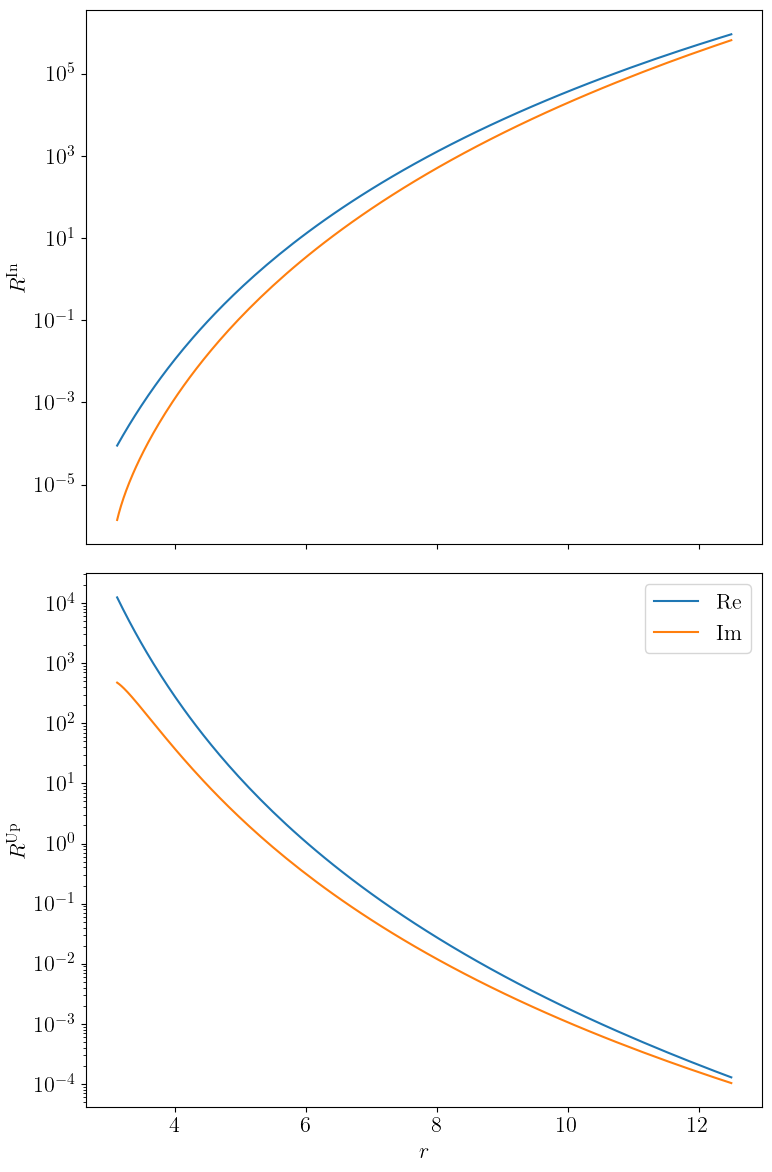

In [39]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 16

r_grid = np.array([Psis.radialpoint(i) for i in range(geo.nsamples // 2)])
Rin = np.array([Psis.radialsolution('In', i) for i in range(len(r_grid))])
Rup = np.array([Psis.radialsolution('Up', i) for i in range(len(r_grid))])

fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True)
axs[0].plot(r_grid, np.abs(Rin.real), label='Re')
axs[0].plot(r_grid, np.abs(Rin.imag), label='Im')
axs[0].set_ylabel(r'$R^\mathrm{In}$')
axs[0].set_yscale('log')

axs[1].plot(r_grid, np.abs(Rup.real), label='Re')
axs[1].plot(r_grid, np.abs(Rup.imag), label='Im')
axs[1].set_ylabel(r'$R^\mathrm{Up}$')
axs[1].set_xlabel(r'$r$')
axs[1].set_yscale('log')

plt.legend()
plt.tight_layout()
plt.show()

and their derivatives

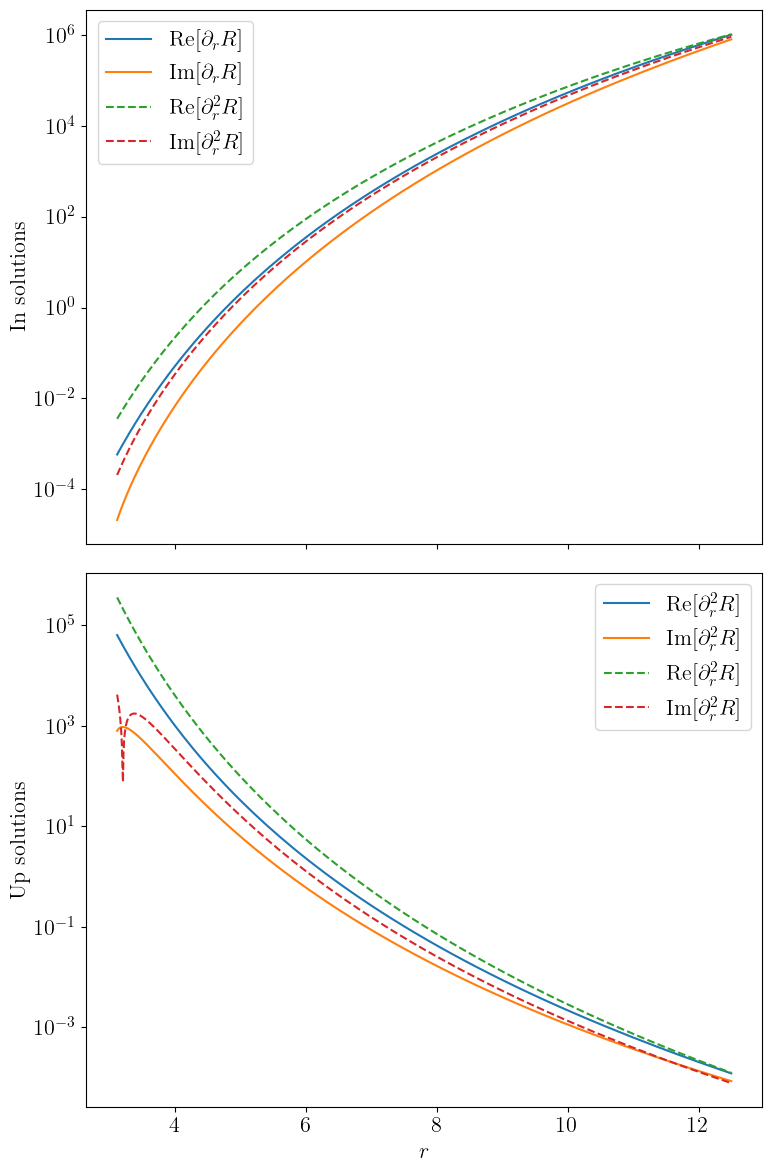

In [45]:
dRin = np.array([Psis.radialderivative('In', i) for i in range(len(r_grid))])
dRup = np.array([Psis.radialderivative('Up', i) for i in range(len(r_grid))])
d2Rin = np.array([Psis.radialderivative2('In', i) for i in range(len(r_grid))])
d2Rup = np.array([Psis.radialderivative2('Up', i) for i in range(len(r_grid))])

fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True)
axs[0].plot(r_grid, np.abs(dRin.real), label='Re$[\partial_r R]$')
axs[0].plot(r_grid, np.abs(dRin.imag), label='Im$[\partial_r R]$')
axs[0].plot(r_grid, np.abs(d2Rin.real), '--', label='Re$[\partial_r^2 R]$')
axs[0].plot(r_grid, np.abs(d2Rin.imag), '--', label='Im$[\partial_r^2 R]$')
axs[0].set_ylabel(r'In solutions')
axs[0].set_yscale('log')
axs[0].legend()

axs[1].plot(r_grid, np.abs(dRup.real), label='Re$[\partial_r^2 R]$')
axs[1].plot(r_grid, np.abs(dRup.imag), label='Im$[\partial_r^2 R]$')
axs[1].plot(r_grid, np.abs(d2Rup.real), '--', label='Re$[\partial_r^2 R]$')
axs[1].plot(r_grid, np.abs(d2Rup.imag), '--', label='Im$[\partial_r^2 R]$')
axs[1].set_ylabel(r'Up solutions')
axs[1].set_xlabel(r'$r$')
axs[1].set_yscale('log')

axs[1].legend()
plt.tight_layout()
plt.show()

### Spheroidal solutions

Similarly, we can plot the polar solution and its derivatives inside the source region

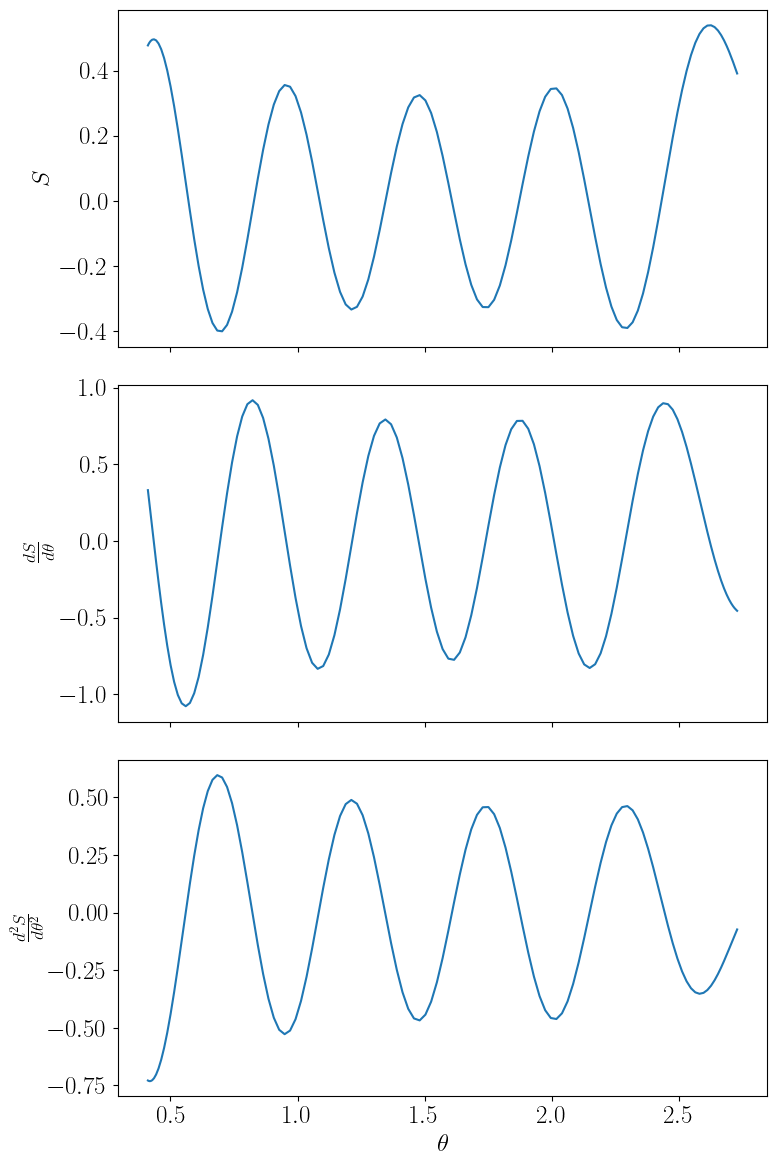

In [37]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 18

th_grid = np.array([Psis.polarpoint(i) for i in range(geo.nsamples // 2)])
S = np.array([Psis.polarsolution(i) for i in range(len(th_grid))])
dS = np.array([Psis.polarderivative(i) for i in range(len(th_grid))])
d2S = np.array([Psis.polarderivative2(i) for i in range(len(th_grid))])

fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
axs[0].plot(th_grid, S, label='S')
axs[1].plot(th_grid, dS/5, label=r"$\frac{dS}{d\theta}$")
axs[2].plot(th_grid, d2S/100, label=r"$\frac{d^2S}{d\theta^2}$")
axs[0].set_ylabel(r'$S$')
axs[1].set_ylabel(r'$\frac{dS}{d\theta}$')
axs[2].set_ylabel(r'$\frac{d^2S}{d\theta^2}$')
axs[2].set_xlabel(r'$\theta$')

plt.tight_layout()
plt.show()